<a href="https://colab.research.google.com/github/penzen/Codes-/blob/master/Lenet_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Overview 
Convolutional layers take an input image and use a smaller filter to extract features from the image.

More than one filter can be applied within each layer, and the size of the filters can vary as well as done in our code.

Our first layer contains 30 filters of size five by five, while our second layer contains 15 filters of three by three.

The purpose of using multiple filters per layer is that each filter learns to look for its unique set of features and can analyze the image in a unique way.

The analysis of all the filters can then be combined to get a network with a higher degree of accuracy.


In [85]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential ,Model
from keras.layers import Flatten,Dense,Dropout
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.utils.np_utils import to_categorical
from  tensorflow.keras.optimizers import Adam
import random

In [86]:
np.random.seed(0)

In [87]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()
 
print(X_train.shape)
print(X_test.shape)
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x"

(60000, 28, 28)
(10000, 28, 28)


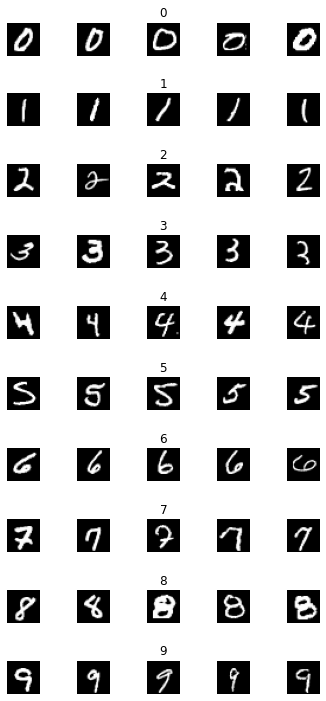

In [88]:
num_of_samples=[]
 
cols = 5
num_classes = 10
 
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
 
for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


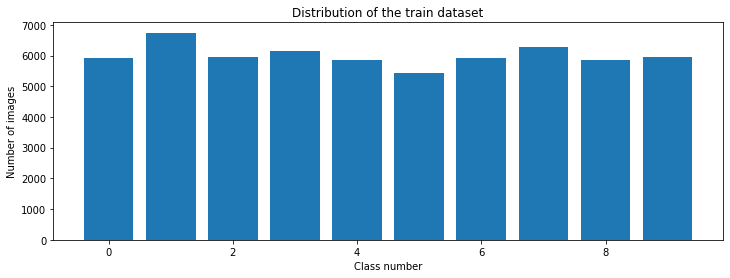

In [89]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()
 


X_train = X_train.reshape(60000, 28, 28, 1)

X = np.array([1,2,34,4])
X_test = X_test.reshape(10000, 28, 28, 1)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
 
X_train = X_train/255
X_test = X_test/255


#The Lenet convolutional arcetecture 
Define the Lenet model funtion 
def lenet_model():
  model = Sequential
  model.add(Conv2D(30, (5,5) input_shape =(28,28,1) activation='relu'))
   puts the convolutional layer in the model.
   the first input is for filters
   As filters input increases the number of parameter also increases which will incrase the compution power 
input_shape =(28,28,1), the network will take in the 28 by 28 images with a depth of 1.

After this layer the image will be reduced to 30 feature maps, each 24 by 24. 
The full output volum of the convolutional layer will have a depth of 30, because each layer will add a depth. 
Each filter 5 x 5, we have 30 filters so multipliying that will give us 750, considering each filter has it's own weights and bias, this will give us 780 adjustable parameters. 

Strides are the kernal steps, the smaller the strides more the kernal convolution operation and thus the more output is returned. 

padding = helps retain the spacial size of the image, because we lose it as we go through.
same - padding/ half padding = ensure that we get the same size as the input 

The default stride is 1. 

model.add(MaxPooling2D(pool_size = (2,2)))
Pooling will reduce the size of the image to 12 by 12 from 24 to 24.

The drop-out layer will help us reduce overfitting in a convolutional neaural network. 

This layer funtions by randomly setting fraction rate of input units 0 , at each update during training. It basically turns off the nodes. 

In a new dataset, the dropout funtion will not work, meaning all the neaurons will combine together. 

When the drop out is not used the nodes will combine together to form a more effiective neaural network, because they will have learned independently of each other.

The drop out layer will reduce the generalization data 

Typically a dropout layer is used in between layers that have a high number of parameters, because it will cause overfitting. 

model.add(Dropout(rate = 0.5 ))
The drop layer takes input for a fraction rate which means the amount of input nodes it will drop at each update. 

0 means no nodes are droped and 1 refering to all the nodes are droped 

0.5 is the recomened amount of layer. 

In [90]:
#the Lenet convolutional arcetecture 
def lenet_model():
  model = Sequential()
  model.add(Conv2D(30, (5,5),input_shape =(28,28,1),activation='relu',))# adds the convolution layer 
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Conv2D(15, (3,3),activation='relu',))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Flatten()) # no inputs required because it just flattens everything
  model.add(Dense(500,activation='relu'))#number of nodes 500
  model.add(Dropout(rate = 0.5 ))
  model.add(Dense(num_classes, activation='softmax')) # softmax will classify everything 
  model.compile(Adam(learning_rate= 0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model



In [91]:
model = lenet_model()
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 500)               188000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)              

In [92]:
history = model.fit(X_train, y_train,epochs = 10, validation_split = 0.1, batch_size = 400, verbose =1, shuffle = 1 ) 

Epoch 1/10
135/135 [==============================] - 1s 8ms/step - loss: 0.2512 - accuracy: 0.9207 - val_loss: 0.0501 - val_accuracy: 0.9857
Epoch 2/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0700 - accuracy: 0.9782 - val_loss: 0.0438 - val_accuracy: 0.9890
Epoch 3/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0594 - accuracy: 0.9817 - val_loss: 0.0427 - val_accuracy: 0.9875
Epoch 4/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0481 - accuracy: 0.9851 - val_loss: 0.0427 - val_accuracy: 0.9897
Epoch 5/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0455 - accuracy: 0.9859 - val_loss: 0.0413 - val_accuracy: 0.9880
Epoch 6/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0425 - accuracy: 0.9871 - val_loss: 0.0385 - val_accuracy: 0.9900
Epoch 7/10
135/135 [==============================] - 1s 7ms/step - loss: 0.0432 - accuracy: 0.9866 - val_loss: 0.0426 - val_accuracy: 0.9887
Epoch 

Text(0.5, 0, 'epoch')

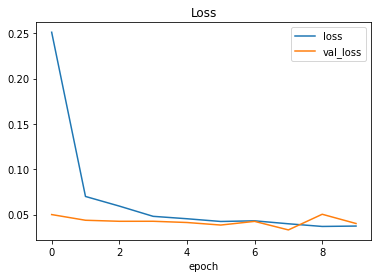

In [93]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

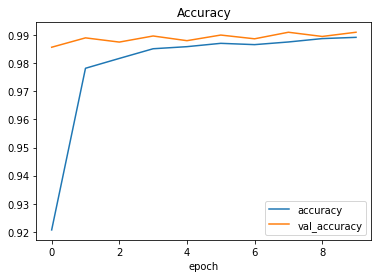

In [94]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

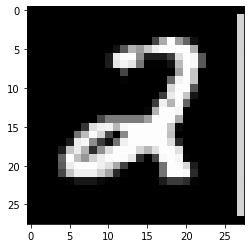

In [95]:
import requests
from PIL import Image
 
url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))
import cv2
 
img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))


In [96]:
img = img/255
img = img.reshape(1, 28 , 28, 1)
 


In [97]:
prediction = model.predict(img)
print("predicted digit:",(prediction))

predicted digit: [[2.3746825e-16 3.7401031e-14 9.9999988e-01 7.0925644e-08 8.0077161e-16
  1.0535976e-17 1.0439365e-16 1.2565612e-10 1.3445728e-10 6.9977817e-18]]


#Model import 
from keras.models import Model
We can do so by using something called the model class API.

So.

From carers, dot models, we will import model, the model class API is an incredibly useful tool as

it allows us to define a model much in the same way as the sequential function we've become familiar

with using the model class API allows us to instantiate layers from pre trained models, effectively

allowing us to reuse sections of previously train models.

We are going to take advantage of this ability to help us visualize the outputs from our two convolutional

layers.

We begin by defining our two layers on a separate cell, layer one and layer two.

We define these functions using the model class API and now in the model function, we need to feed

the appropriate arguments to create instances of the proper sections of our pre trained neural network.

The model function requires two arguments, the first argument, the fines, all the inputs into your

network, while the second argument defines the outputs that you want from the model.
layer1  = Model(inputs = model.layers[0].input) 
Gives us the input that our layer recived. 

In [107]:
#Model API used to visual the model
layer1  = Model(inputs= model.layers[0].input, outputs = model.layers[0].output)#access the first layer of the model
layer2  = Model(inputs= model.layers[0].input, outputs = model.layers[2].output)
visual_layer1 = layer1.predict(img)
visual_layer2 = layer2.predict(img)
print(visual_layer1.shape)
print(visual_layer2.shape)

(1, 24, 24, 30)
(1, 10, 10, 15)


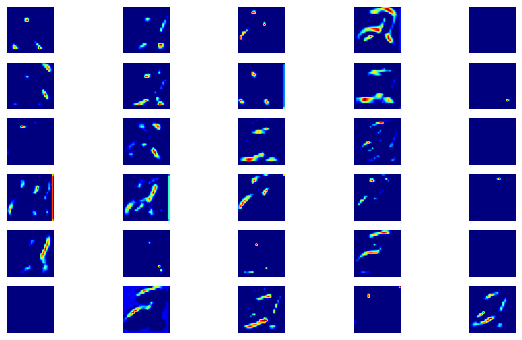

In [110]:
plt.figure(figsize=(10,6))
for i in range(30):
  plt.subplot(6,5,i+1)
  plt.imshow(visual_layer1[0, :,:, i],cmap= plt.get_cmap('jet'))
  plt.axis('off')



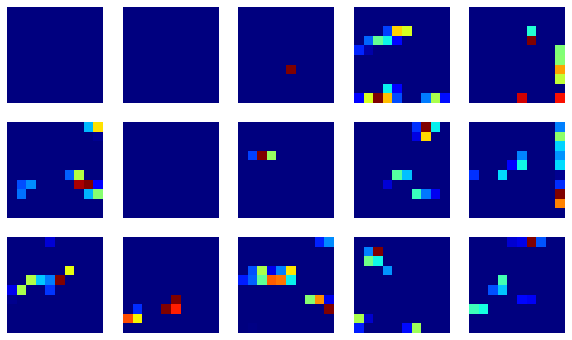

In [111]:
plt.figure(figsize=(10,6))
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.imshow(visual_layer2[0, :,:, i],cmap= plt.get_cmap('jet'))
  plt.axis('off')